In [1]:
import matplotlib.pyplot as plt
import random
from matplotlib.patches import Circle
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

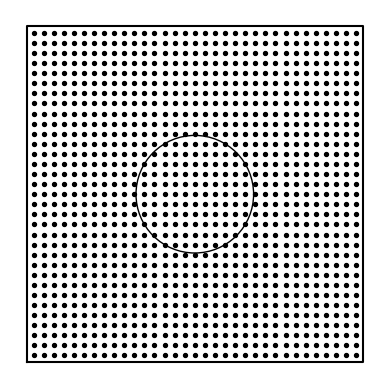

Total number of points generated inside the box: 1089


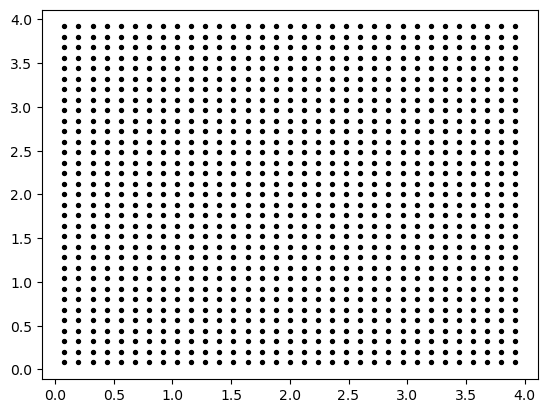

In [7]:
#Define the 2D Box, Points inside the box and the circle

def draw_square(x, y, side_length):
    x_points = [x, x + side_length, x + side_length, x, x]
    y_points = [y, y, y + side_length, y + side_length, y]
    plt.plot(x_points, y_points, color='black')

def draw_points(x, y, side_length, distance_x, distance_y):
    center_x = x + side_length / 2
    center_y = y + side_length / 2
    num_points_x = int(side_length / distance_x)
    num_points_y = int(side_length / distance_y)
    # Initialize a counter
    num_points = 0
    for i in range(-num_points_x//2, num_points_x//2 + 1):
        for j in range(-num_points_y//2, num_points_y//2 + 1):
            point_x = center_x + i * distance_x
            point_y = center_y + j * distance_y
            if point_x >= x and point_x <= x + side_length and point_y >= y and point_y <= y + side_length:
                plt.scatter(point_x, point_y, color='black',s=8)
                num_points += 1
    # Return the total number of points generated inside the box
    return num_points


def draw_circle(center_x, center_y, radius):
    circle = Circle((center_x, center_y), radius, fill=False, color='black')
    plt.gca().add_artist(circle)

# Draw a square with bottom-left corner at (0, 0) and side length 2
draw_square(0, 0, 4)

# Draw uniformly spaced points inside the square
distance_x = 0.12
distance_y = 0.12
draw_points(0, 0, 4, distance_x, distance_y)

# Draw a circle with center at (0.5, 0.5) and radius 0.25
draw_circle(2, 2, 0.70)

plt.gca().set_aspect('equal')
plt.axis('off')
plt.show()

num_points = draw_points(0, 0, 4, 0.12, 0.12)
print("Total number of points generated inside the box:", num_points)

In [9]:
# creating dataframe with coordinates and the material

# Constants
start_x = 0.02; end_x = 3.98; start_y = 0.02; end_y = 3.98
center_x = 2; center_y = 2

# Loop through radius values
for radius in np.arange(0.15, 1.55, 0.5):
    df = pd.DataFrame(columns=["x_coordinate", "y_coordinate", "young's modulus"])

    # Generate points and assign material
    for x_coord in np.arange(start_x, end_x, distance_x):
        for y_coord in np.arange(start_y, end_y, distance_y):
            if (x_coord - center_x)**2 + (y_coord - center_y)**2 <= radius**2:
                df.loc[len(df.index)] = [x_coord, y_coord, "1"]
            else:
                df.loc[len(df.index)] = [x_coord, y_coord, "2"]

    # Print summary information
    print("Radius:", radius)
    print("Number of points in material A:", df["young's modulus"].value_counts()["1"])
    print("Number of points in material B:", df["young's modulus"].value_counts()["2"])

    # Save dataframe to CSV file with appropriate name
    filename = "csv" + str(int(radius*100)) + ".csv"
    df.to_csv(filename, index=False)

df.shape

number of coords in A: 112
number of coords in B: 977
      x_coordinate  y_coordinate young's modulus
0             0.02          0.02               2
1             0.02          0.14               2
2             0.02          0.26               2
3             0.02          0.38               2
4             0.02          0.50               2
...            ...           ...             ...
1084          3.86          3.38               2
1085          3.86          3.50               2
1086          3.86          3.62               2
1087          3.86          3.74               2
1088          3.86          3.86               2

[1089 rows x 3 columns]


(1089, 3)

In [20]:
#convert into 2d array
#arr = df.pivot(index='y_coordinate', columns='x_coordinate', values='material').to_numpy()
#arr = df.pivot(index='y_coordinate', columns='x_coordinate', values='material').to_numpy().reshape((81, 3))
#print(arr)
#arr.shape

In [1]:
#converting the panda data frame in a 2D array
#array_2d = df.values
#print(array_2d)
#array_2d.shape

In [18]:
# Load CSV file into a NumPy array
#array_2d = df.to_numpy()
#array_2d